Cargamos el archivo de datos y verificamos que se ha cargado correctamente.

In [ ]:

import pyarrow.parquet as pq
import pandas as pd

# Especifica la ruta del archivo Parquet
ruta_archivo = "/content/drive/MyDrive/No Country Proyecto/Data/Clean/Icfes2023_feature_engineering.parquet"

# ver si el archivo es un archivo Parquet
try:
    pq.ParquetFile(ruta_archivo)
    print("El archivo es un archivo Parquet válido.")
except Exception as e:
    print("Error:", e)


El archivo es un archivo Parquet válido.


In [ ]:
# Lee el archivo Parquet en un DataFrame de pandas
df = pd.read_parquet(ruta_archivo)

In [ ]:
print(df.head())

   ESTU_TIPODOCUMENTO ESTU_GENERO  PERIODO ESTU_DEPTO_RESIDE  \
4                  TI           F        1             VALLE   
6                  TI           F        1             VALLE   
7                  TI           M        1             VALLE   
10                 TI           F        1             VALLE   
13                 TI           M        1            NARIÑO   

   ESTU_MCPIO_RESIDE ESTU_PRESENTACIONSABADO  FAMI_ESTRATOVIVIENDA  \
4               CALI                      No                     2   
6         CAICEDONIA                      No                     1   
7            JAMUNDÍ                      No                     1   
10              CALI                      No                     3   
13             PASTO                      No                     4   

   FAMI_PERSONASHOGAR  FAMI_CUARTOSHOGAR  \
4               1 a 2                2.0   
6               3 a 4                2.0   
7               5 a 6                2.0   
10              5 

In [ ]:
# Imprimir la lista de columnas y tipos de datos
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 180413 entries, 4 to 551147
Data columns (total 37 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ESTU_TIPODOCUMENTO           180413 non-null  object 
 1   ESTU_GENERO                  180413 non-null  object 
 2   PERIODO                      180413 non-null  int64  
 3   ESTU_DEPTO_RESIDE            180413 non-null  object 
 4   ESTU_MCPIO_RESIDE            180413 non-null  object 
 5   ESTU_PRESENTACIONSABADO      180413 non-null  object 
 6   FAMI_ESTRATOVIVIENDA         180413 non-null  int64  
 7   FAMI_PERSONASHOGAR           180413 non-null  object 
 8   FAMI_CUARTOSHOGAR            180413 non-null  float64
 9   FAMI_EDUCACIONPADRE          180413 non-null  object 
 10  FAMI_EDUCACIONMADRE          180413 non-null  object 
 11  FAMI_TRABAJOLABORPADRE       180413 non-null  int64  
 12  FAMI_TRABAJOLABORMADRE       180413 non-null  int64  
 13  COLE

In [ ]:
# Estadísticas descriptivas para todas las variables
print(df.describe())



             PERIODO  FAMI_ESTRATOVIVIENDA  FAMI_CUARTOSHOGAR  \
count  180413.000000         180413.000000      180413.000000   
mean        1.969520              2.284608           2.752867   
std         0.171905              1.041038           0.918905   
min         1.000000              1.000000           1.000000   
25%         2.000000              2.000000           2.000000   
50%         2.000000              2.000000           3.000000   
75%         2.000000              3.000000           3.000000   
max         2.000000              6.000000           6.000000   

       FAMI_TRABAJOLABORPADRE  FAMI_TRABAJOLABORMADRE  DESEMP_LECTURA_CRITICA  \
count           180413.000000           180413.000000           180413.000000   
mean                 6.901288                6.386136                2.817801   
std                  3.204181                3.149581                0.733410   
min                  2.000000                3.000000                1.000000   
25%      

Análisis de Datos sobre el Rendimiento Académico y Características Socioeconómicas de Estudiantes

El conjunto de datos proporcionado contiene información detallada sobre el rendimiento académico y diversas características socioeconómicas de un grupo de estudiantes. A continuación, se presenta un resumen de las principales variables y hallazgos:

**Estrato Socioeconómico y Vivienda:**
La mayoría de los estudiantes tienen un estrato socioeconómico promedio, con un promedio de 1.97 en una escala de 1 a 2.
La cantidad promedio de habitaciones en el hogar familiar es de aproximadamente 2.75, con una desviación estándar de 0.92.

**Trabajo de los Padres:**
Los padres de los estudiantes tienen principalmente trabajos laborales, con puntajes promedio de aproximadamente 6.90 para el padre y 6.39 para la madre en una escala de 2 a 12.

**Desempeño Académico:**
El desempeño promedio en lectura crítica es de aproximadamente 2.82, en matemáticas es de 2.62, en ciencias naturales es de 2.26, y en ciencias sociales/ciudadanas es de 2.18 en una escala de 1 a 4.
El puntaje global promedio es de aproximadamente 264.94, con un percentil promedio de 55.15.

**Índice Socioeconómico:**
El índice socioeconómico individual de los estudiantes tiene un promedio de aproximadamente 51.87, mientras que el índice socioeconómico del establecimiento educativo tiene un promedio de 2.49.

Estos hallazgos sugieren que existe una relación entre las características socioeconómicas y el rendimiento académico de los estudiantes. Los estudiantes con un estrato socioeconómico más alto tienden a tener un mejor desempeño académico en general. Sin embargo, es importante tener en cuenta que estos son solo datos descriptivos y se necesitarían análisis adicionales para comprender completamente las relaciones causales entre estas variables.

In [ ]:
# Resumen estadístico para todas las variables
print(df.describe(include="all"))


       ESTU_TIPODOCUMENTO ESTU_GENERO        PERIODO ESTU_DEPTO_RESIDE  \
count              180413      180413  180413.000000            180413   
unique                  2           2            NaN                20   
top                    TI           F            NaN            BOGOTÁ   
freq               162979       99512            NaN             34654   
mean                  NaN         NaN       1.969520               NaN   
std                   NaN         NaN       0.171905               NaN   
min                   NaN         NaN       1.000000               NaN   
25%                   NaN         NaN       2.000000               NaN   
50%                   NaN         NaN       2.000000               NaN   
75%                   NaN         NaN       2.000000               NaN   
max                   NaN         NaN       2.000000               NaN   

       ESTU_MCPIO_RESIDE ESTU_PRESENTACIONSABADO  FAMI_ESTRATOVIVIENDA  \
count             180413             

Clustering

In [ ]:
# Librerias
import pandas as pd
from google.colab import drive

In [ ]:
# Carga el archivo CSV desde Google Drive
drive.mount('/content/drive')
ruta_archivo = '/content/drive/MyDrive/No Country Proyecto/Data/Clean/Icfes2023_feature_engineering.parquet'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_parquet(ruta_archivo)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180413 entries, 4 to 551147
Data columns (total 37 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ESTU_TIPODOCUMENTO           180413 non-null  object 
 1   ESTU_GENERO                  180413 non-null  object 
 2   PERIODO                      180413 non-null  int64  
 3   ESTU_DEPTO_RESIDE            180413 non-null  object 
 4   ESTU_MCPIO_RESIDE            180413 non-null  object 
 5   ESTU_PRESENTACIONSABADO      180413 non-null  object 
 6   FAMI_ESTRATOVIVIENDA         180413 non-null  int64  
 7   FAMI_PERSONASHOGAR           180413 non-null  object 
 8   FAMI_CUARTOSHOGAR            180413 non-null  float64
 9   FAMI_EDUCACIONPADRE          180413 non-null  object 
 10  FAMI_EDUCACIONMADRE          180413 non-null  object 
 11  FAMI_TRABAJOLABORPADRE       180413 non-null  int64  
 12  FAMI_TRABAJOLABORMADRE       180413 non-null  int64  
 13  COLE

Cambiar a numéricas las variables categoricas (object)

In [ ]:
# Seleccionar solo las columnas categóricas para aplicar One-Hot Encoding
categorical_cols = df.select_dtypes(include=['object']).columns

# Aplicar One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols)

# Mostrar las primeras filas del DataFrame codificado
print(df_encoded.head())


    PERIODO  FAMI_ESTRATOVIVIENDA  FAMI_CUARTOSHOGAR  FAMI_TRABAJOLABORPADRE  \
4         1                     2                2.0                       5   
6         1                     1                2.0                       5   
7         1                     1                2.0                       7   
10        1                     3                3.0                       6   
13        1                     4                3.0                       3   

    FAMI_TRABAJOLABORMADRE  DESEMP_LECTURA_CRITICA  DESEMP_MATEMATICAS  \
4                        5                       3                   3   
6                        4                       4                   3   
7                        4                       3                   3   
10                       3                       4                   4   
13                       3                       3                   3   

    DESEMP_C_NATURALES  DESEMP_SOCIALES_CIUDADANAS  PUNT_GLOBAL  ...  \
4 

In [ ]:
print(df_encoded.dtypes)


PERIODO                         int64
FAMI_ESTRATOVIVIENDA            int64
FAMI_CUARTOSHOGAR             float64
FAMI_TRABAJOLABORPADRE          int64
FAMI_TRABAJOLABORMADRE          int64
                               ...   
DEDICACION_ESTUDIO_6-4-4-2       bool
DEDICACION_ESTUDIO_6-4-4-3       bool
DEDICACION_ESTUDIO_6-5-1-2       bool
DEDICACION_ESTUDIO_6-5-1-3       bool
DEDICACION_ESTUDIO_6-5-3-3       bool
Length: 834, dtype: object


Hago esto para poder graficar la matriz de correlación entre las variables.

In [ ]:
# Convertir columnas booleanas a tipo numérico
df_encoded = df_encoded.astype({'DEDICACION_ESTUDIO_6-4-4-2': int,
                                'DEDICACION_ESTUDIO_6-4-4-3': int,
                                'DEDICACION_ESTUDIO_6-5-1-2': int,
                                'DEDICACION_ESTUDIO_6-5-1-3': int,
                                'DEDICACION_ESTUDIO_6-5-3-3': int})

# Ahora puedes calcular la matriz de correlación
correlation_matrix = df_encoded.corr()
print(correlation_matrix)


                             PERIODO  FAMI_ESTRATOVIVIENDA  FAMI_CUARTOSHOGAR  \
PERIODO                     1.000000             -0.296470          -0.045721   
FAMI_ESTRATOVIVIENDA       -0.296470              1.000000           0.145740   
FAMI_CUARTOSHOGAR          -0.045721              0.145740           1.000000   
FAMI_TRABAJOLABORPADRE      0.105543             -0.140681          -0.036433   
FAMI_TRABAJOLABORMADRE      0.084166             -0.089162          -0.037233   
...                              ...                   ...                ...   
DEDICACION_ESTUDIO_6-4-4-2  0.003707             -0.007317          -0.001460   
DEDICACION_ESTUDIO_6-4-4-3  0.006723             -0.013319          -0.012744   
DEDICACION_ESTUDIO_6-5-1-2  0.003116             -0.015479          -0.004551   
DEDICACION_ESTUDIO_6-5-1-3  0.007218             -0.032020          -0.023458   
DEDICACION_ESTUDIO_6-5-3-3  0.004159             -0.018894          -0.012022   

                           

Correlación, solo con variables numericas.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

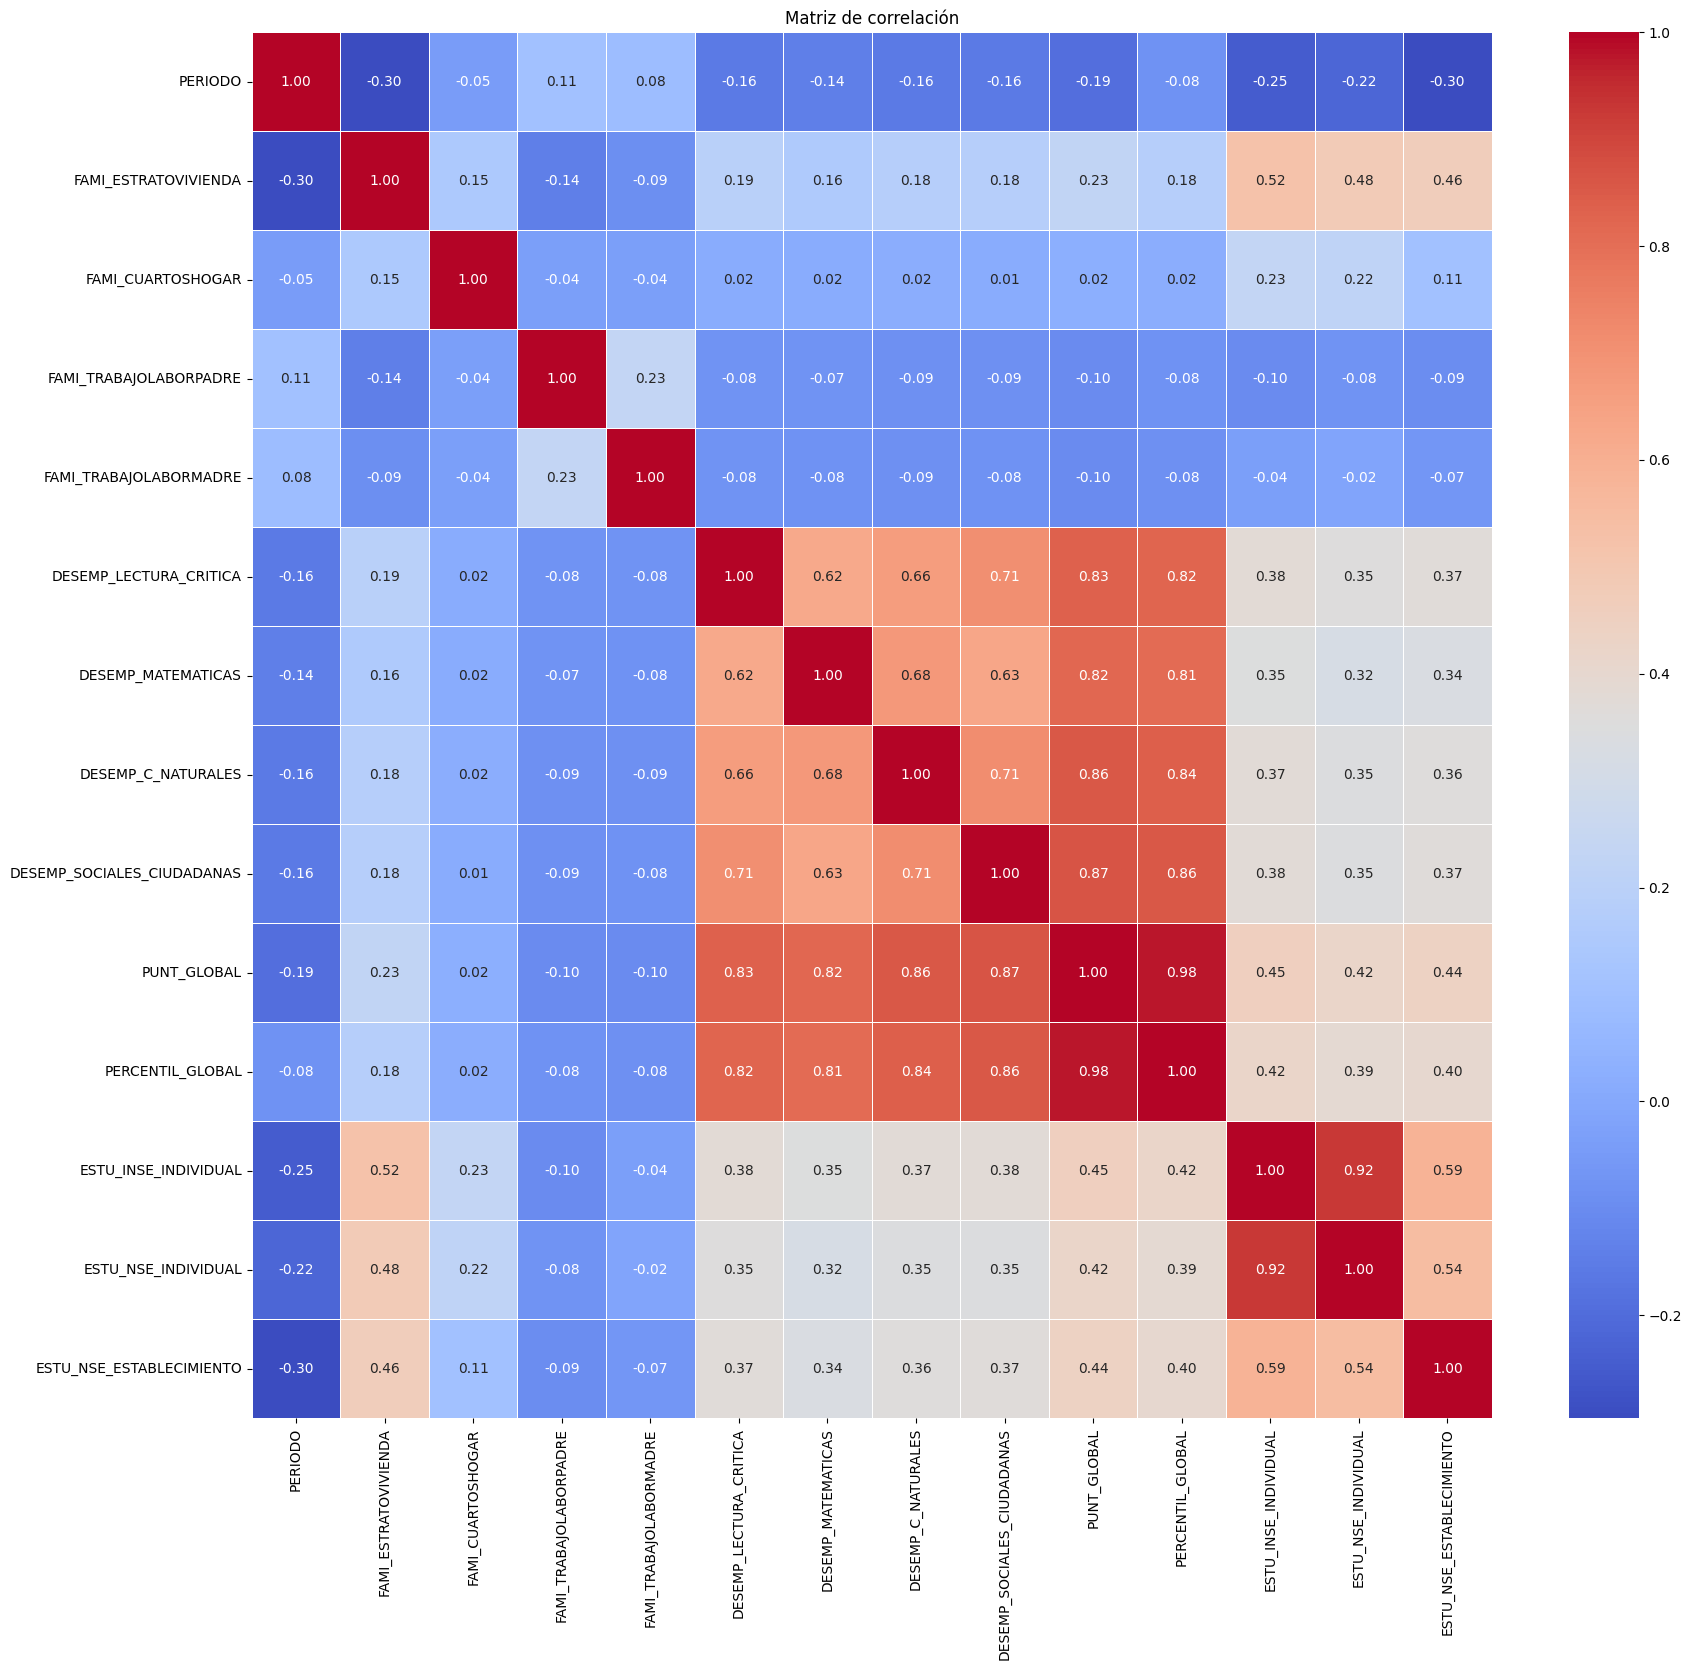

In [ ]:
# Seleccionar solo las columnas numéricas
numeric_df = df.select_dtypes(include=['number'])

# Calcula la matriz de correlación
correlation_matrix = numeric_df.corr()

# Visualiza la matriz de correlación usando un mapa de calor
plt.figure(figsize=(20, 18))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de correlación')
plt.show()


Correlación con todas las variables (usando one hot encoding) tarda 25 minutos y no se ve bien, no ejecutar.

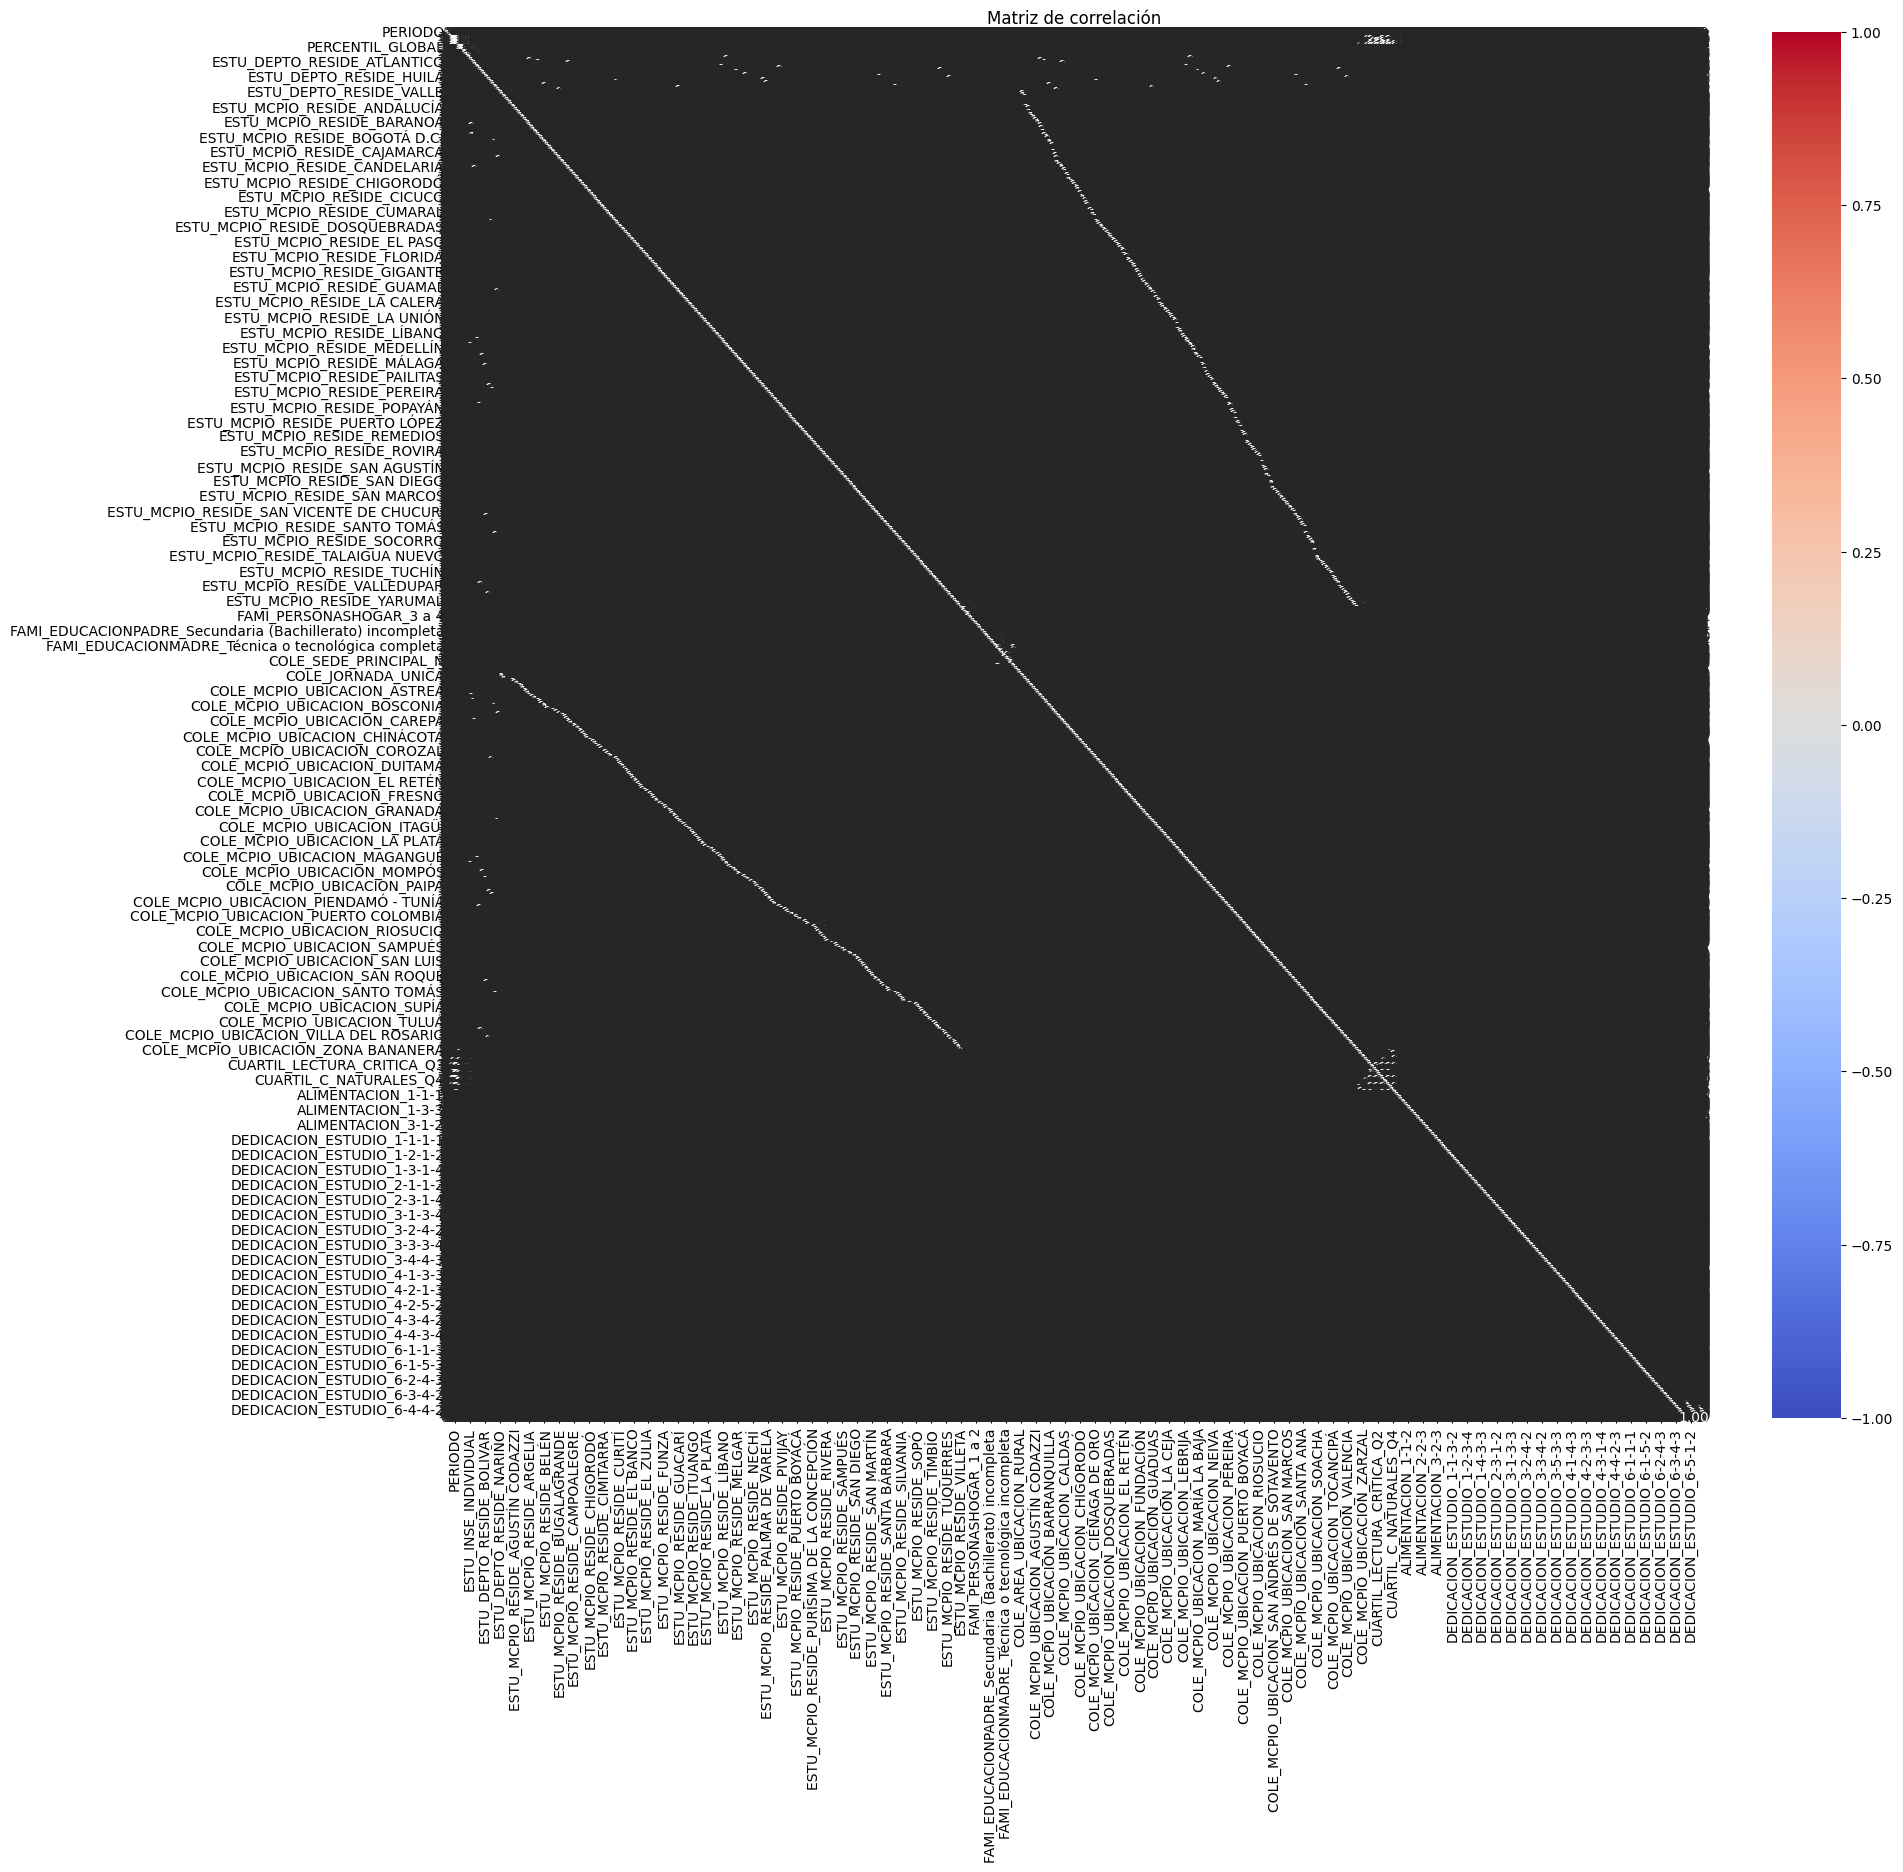

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Calcula la matriz de correlación
# correlation_matrix =  df_encoded.corr()

# # Visualiza la matriz de correlación usando un mapa de calor
# plt.figure(figsize=(20, 18))

# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
# plt.title('Matriz de correlación')
# plt.show()





In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


# Antes de aplicar K-Means, puedes escalar tus datos si es necesario
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_encoded)

# Crear un objeto KMeans
kmeans = KMeans(n_clusters=5, n_init=10, random_state=42) # n_init = 10 está puesto para evitar warnings

# Ajustar el modelo a tus datos
kmeans.fit(scaled_data)

# Obtener las etiquetas de los clusters y los centroides
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Imprimir los resultados
print("Etiquetas de los clusters:")
print(labels)
print("Coordenadas de los centroides:")
print(centroids)


Etiquetas de los clusters:
[2 2 2 ... 2 2 3]
Coordenadas de los centroides:
[[ 0.14771585 -0.24544052 -0.05265864 ...  0.00930512  0.03125476
   0.03258396]
 [ 0.17730851 -0.65798041 -0.32078114 ... -0.02979331  0.03856639
  -0.02960635]
 [ 0.09369873 -0.16708692 -0.02434858 ...  0.00394276 -0.00292273
  -0.00753968]
 [-0.36467863  0.59144408  0.10594527 ... -0.01751887 -0.02995764
  -0.02343044]
 [ 0.17176656  0.26653777  0.08820145 ... -0.00845677 -0.04477696
  -0.02960635]]


In [ ]:
from sklearn.cluster import KMeans

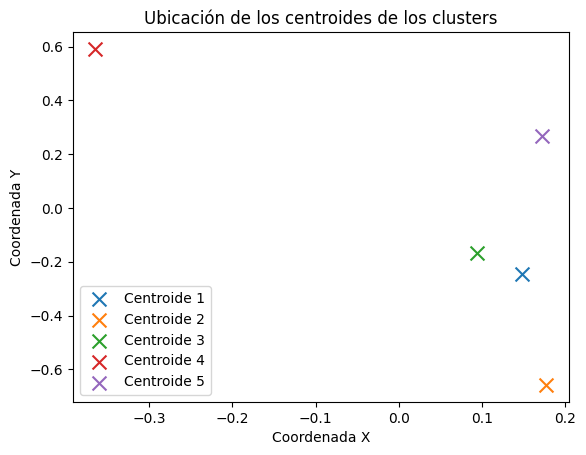

In [ ]:
import matplotlib.pyplot as plt

# Coordenadas de los centroides
centroides = [[ 0.14771585, -0.24544052, -0.05265864, ...,  0.00930512,  0.03125476, 0.03258396],
              [ 0.17730851, -0.65798041, -0.32078114, ..., -0.02979331,  0.03856639, -0.02960635],
              [ 0.09369873, -0.16708692, -0.02434858, ...,  0.00394276, -0.00292273, -0.00753968],
              [-0.36467863,  0.59144408,  0.10594527, ..., -0.01751887, -0.02995764, -0.02343044],
              [ 0.17176656,  0.26653777,  0.08820145, ..., -0.00845677, -0.04477696, -0.02960635]]

# Etiquetas de los clusters
etiquetas = [2, 2, 2, ..., 2, 2, 3]

# Plotear los centroides
for i, centroide in enumerate(centroides):
    plt.scatter(centroide[0], centroide[1], label=f'Centroide {i+1}', marker='x', s=100)

# Agregar leyenda y título
plt.legend()
plt.title('Ubicación de los centroides de los clusters')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')

# Mostrar el gráfico
plt.show()


In [ ]:
#@title Código para graficar fronteras de decisión
def plot_data(x, labels, marker='.', color='k', ls='', markersize=2, **kwargs):
    unique_labels = np.unique(labels)
    for label in unique_labels:
        plt.plot(x[labels == label, 0], x[labels == label, 1], marker=marker, ls=ls, color=color, markersize=markersize, **kwargs)

def plot_centroids(centroids, weights=None, circle_color='r', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1], s=35, linewidths=8, color=circle_color, zorder=10, alpha=0.5)

def plot_decision_boundaries(centroids, labels, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = centroids.min(axis=0) - 0.1
    maxs = centroids.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = labels
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(centroids, np.unique(labels), marker='o', color='r', markersize=8)
    if show_centroids:
        plot_centroids(centroids)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14)
    else:
        plt.tick_params(labelleft=False)


In [ ]:
print(df_encoded.values)


[[1 2 2.0 ... 0 0 0]
 [1 1 2.0 ... 0 0 0]
 [1 1 2.0 ... 0 0 0]
 ...
 [2 1 2.0 ... 0 0 0]
 [2 1 2.0 ... 0 0 0]
 [2 3 3.0 ... 0 0 0]]


Los centroides en el mismo lugar para lograr una mejor visibilidad de los datos.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


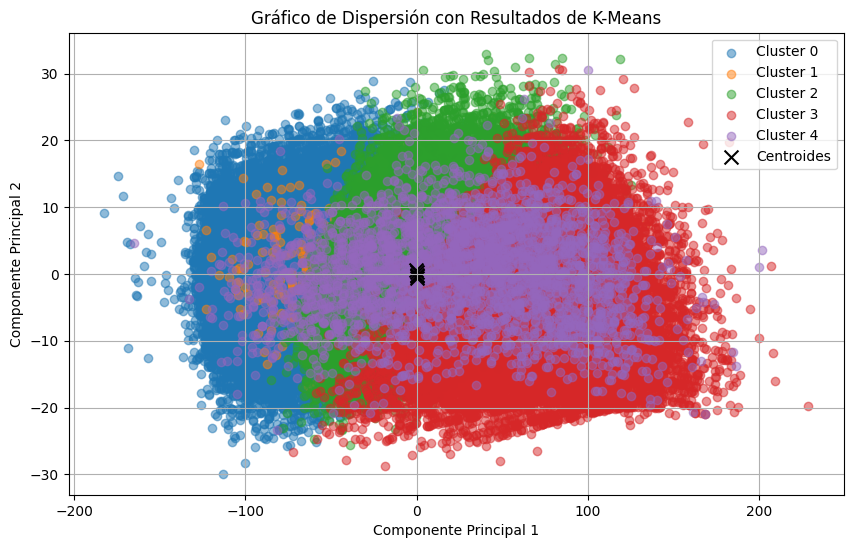

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Aplicar PCA para reducir la dimensionalidad de los datos
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_encoded)

# Crear un DataFrame con los componentes principales y las etiquetas de los clusters
df_pca = pd.DataFrame(data=principal_components, columns=['Componente Principal 1', 'Componente Principal 2'])
df_pca['Cluster'] = kmeans.labels_

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
for cluster in range(len(kmeans.cluster_centers_)):
    plt.scatter(df_pca[df_pca['Cluster'] == cluster]['Componente Principal 1'],
                df_pca[df_pca['Cluster'] == cluster]['Componente Principal 2'],
                label=f'Cluster {cluster}', alpha=0.5)

# Marcar los centroides de los clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='black', marker='x', s=100, label='Centroides')

plt.title('Gráfico de Dispersión con Resultados de K-Means')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Agrupar los datos por la etiqueta del cluster
cluster_groups = df_encoded.groupby(kmeans.labels_)

# Calcular las estadísticas descriptivas para cada cluster
cluster_statistics = cluster_groups.describe()

# Mostrar las estadísticas descriptivas
for cluster in range(len(kmeans.cluster_centers_)):
    print(f"\nEstadísticas del Cluster {cluster}:")
    print(cluster_statistics.loc[cluster].transpose())



Estadísticas del Cluster 0:
PERIODO                     count    53239.000000
                            mean         1.994910
                            std          0.071165
                            min          1.000000
                            25%          2.000000
                                         ...     
DEDICACION_ESTUDIO_6-5-3-3  min          0.000000
                            25%          0.000000
                            50%          0.000000
                            75%          0.000000
                            max          1.000000
Name: 0, Length: 152, dtype: float64

Estadísticas del Cluster 1:
PERIODO                     count    537.0
                            mean       2.0
                            std        0.0
                            min        2.0
                            25%        2.0
                                     ...  
DEDICACION_ESTUDIO_6-5-3-3  min        0.0
                            25%        0.0
           

Cluster 0:

Count: Indica la cantidad de observaciones en este cluster. En este caso, hay 53,239 observaciones en el cluster 0.
Media (Mean): Es el valor promedio de la variable en este cluster. En este caso, la media de la variable PERIODO es aproximadamente 1.995.
Desviación estándar (Standard Deviation): Indica la dispersión de los datos en este cluster. Una desviación estándar más alta significa que los datos están más dispersos alrededor de la media. Aquí, la desviación estándar de PERIODO es aproximadamente 0.071.
Mínimo (Min): El valor mínimo observado en este cluster. Para PERIODO, el valor mínimo es 1.
Percentiles (25%, 50%, 75%): Estos percentiles dividen los datos ordenados en cuatro partes iguales. El percentil 25 (25%) es el valor por debajo del cual cae el 25% de las observaciones, y así sucesivamente. En este cluster, el 25% de las observaciones tienen un valor de PERIODO de 2 o menos (25%), la mediana es 2 (50%), y el 75% de las observaciones tienen un valor de PERIODO de 2 o menos (75%).
Máximo (Max): El valor máximo observado en este cluster. Para PERIODO, el valor máximo es 1.
El análisis de estas estadísticas nos proporciona información sobre la distribución de la variable PERIODO en el cluster 0.

Todos los clusters

Cluster 0:

Características principales: Los estudiantes en este cluster tienden a provenir de hogares con un estrato socioeconómico bajo o medio. Su desempeño académico en lectura crítica, matemáticas, ciencias naturales y ciencias sociales y ciudadanas es en promedio bajo.
Periodo de examen: Todos los estudiantes presentaron el examen en el segundo periodo.

Cluster 1:

Características principales: Los estudiantes en este cluster tienden a provenir de hogares con un estrato socioeconómico medio o alto. Su desempeño académico en todas las áreas es en promedio alto.
Periodo de examen: La mayoría de los estudiantes presentaron el examen en el primer periodo.

Cluster 2:

Características principales: Los estudiantes en este cluster tienden a provenir de hogares con un estrato socioeconómico bajo o medio. Su desempeño académico en todas las áreas es en promedio bajo.
Periodo de examen: La mayoría de los estudiantes presentaron el examen en el primer periodo.

Cluster 3:

Características principales: Los estudiantes en este cluster tienden a provenir de hogares con un estrato socioeconómico bajo o medio. Su desempeño académico en todas las áreas es en promedio bajo.
Periodo de examen: La mayoría de los estudiantes presentaron el examen en el primer periodo.

Cluster 4:

Características principales: Los estudiantes en este cluster tienden a provenir de hogares con un estrato socioeconómico bajo o medio. Su desempeño académico en todas las áreas es en promedio bajo.
Periodo de examen: Todos los estudiantes presentaron el examen en el segundo periodo.